In [110]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
import os
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [111]:
train_path='/kaggle/input/covid19-image-dataset/Covid19-dataset/train'
test_path='/kaggle/input/covid19-image-dataset/Covid19-dataset/test'

In [112]:
image_classes = os.listdir(train_path)
print(image_classes)

['Normal', 'Viral Pneumonia', 'Covid']


In [113]:
#visualize data
def plot_image(image_classes):
    plt.figure(figsize=(12,12))

    for i,category in enumerate(image_classes):
        image_path=train_path +'/'+category
        image_in_folder  = os.listdir(image_path)

        first_image = image_in_folder[0]
        first_image_path = image_path + '/'+first_image

        img = image.load_img(first_image_path)

        plt.subplot(3,5,i+1)
        plt.imshow(img)
        plt.title(category)
        plt.axis('off')

    plt.show()

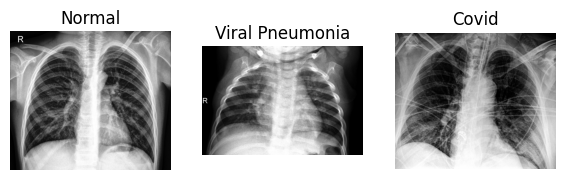

In [114]:
plot_image(image_classes)

In [115]:
image_generator = ImageDataGenerator(rescale=1/255)

In [116]:
train_data = image_generator.flow_from_directory(train_path,
                                                target_size=(150,150),
                                                batch_size=32,
                                                class_mode='categorical')

Found 251 images belonging to 3 classes.


In [117]:
test_data = image_generator.flow_from_directory(test_path,
                                                target_size=(150,150),
                                                batch_size=32,
                                                class_mode='categorical')

Found 66 images belonging to 3 classes.


In [118]:
#Build CNN Model
cnn_model = Sequential()

In [119]:
#add conv layer with filters, kernel size , activation, input shape
cnn_model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', 
                    activation = 'relu', input_shape = [150, 150, 3]))

#add pooling layer
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

#add conv layer with filters, kernel size , activation
cnn_model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', 
                    activation = 'relu'))

#add pooling layer
cnn_model.add(MaxPooling2D())

#add Flatten layer
cnn_model.add(Flatten())

#add dense layers
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(128, activation = 'relu'))

#add output layer
cnn_model.add(Dense(3, activation='softmax'))

In [120]:
cnn_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 87616)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │    11,214,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,251,267 (42.92 MB)

 Trainable params: 11,251,267 (42.92 MB)

 Non-trainable params: 0 (0.00 B)

In [121]:
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',  # use sparse_categorical_crossentropy if labels are integers
                  metrics=['accuracy'])

In [122]:
cnn_model.fit(train_data,
              epochs = 5)

Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 500ms/step - accuracy: 0.4518 - loss: 1.7687
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 602ms/step - accuracy: 0.9403 - loss: 0.3889
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 609ms/step - accuracy: 0.9447 - loss: 0.1461
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 589ms/step - accuracy: 0.9720 - loss: 0.0698
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 601ms/step - accuracy: 0.9867 - loss: 0.0355


In [123]:
cnn_model.evaluate(test_data)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.8999 - loss: 0.2573


[0.23727425932884216, 0.9090909361839294]

In [124]:
#save model
cnn_model.save('veg_model.h5')